<a href="https://colab.research.google.com/github/theclassofai/Multiclass_Image_Classification/blob/main/Multiclass_Classification_CNN_DataAug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiclass Image Classification using CNN (KERAS)

## Step 1. Load data directory from Kaggle using API

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
os.environ['KAGGLE_USERNAME'] = "sagihaider" # username from the json file
os.environ['KAGGLE_KEY'] = "XXXX" # key from the json file

In [3]:
!kaggle datasets download -d vijaygiitk/multiclass-weather-dataset

Dataset URL: https://www.kaggle.com/datasets/vijaygiitk/multiclass-weather-dataset
License(s): CC0-1.0
 99% 133M/134M [00:09<00:00, 18.2MB/s]
100% 134M/134M [00:09<00:00, 14.3MB/s]


In [4]:
# Unzip training data
from zipfile import ZipFile
file_name = "/content/multiclass-weather-dataset.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


## Step 2. Exploratory Data Analysis (EDA)

In [5]:
import warnings
warnings.filterwarnings('ignore')
# Get all the paths
data_dir_list = os.listdir('/content/dataset')
print(data_dir_list)
path, dirs, files = next(os.walk("/content/dataset"))
file_count = len(files)
# print(file_count)

['foggy', 'cloudy', 'rainy', 'sunrise', 'alien_test', 'test.csv', 'shine']


In [6]:
# Make new base directory
original_dataset_dir = '/content/dataset'
base_dir = '/content/weather-data/'
os.mkdir(base_dir)

In [7]:
#create two folders (train and validation)
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

#Under train folder create five folders
# (cloud, folly, rainy, shine, sunrise)

train_cloud_dir = os.path.join(train_dir, 'cloudy')
os.mkdir(train_cloud_dir)

train_foggy_dir = os.path.join(train_dir, 'foggy')
os.mkdir(train_foggy_dir)

train_rainy_dir = os.path.join(train_dir, 'rainy')
os.mkdir(train_rainy_dir)

train_shine_dir = os.path.join(train_dir, 'shine')
os.mkdir(train_shine_dir)

train_sunrise_dir = os.path.join(train_dir, 'sunrise')
os.mkdir(train_sunrise_dir)

#Under validation folder create five folders
# (cloud, folly, rainy, shine, sunrise)

validation_cloud_dir = os.path.join(validation_dir, 'cloudy')
os.mkdir(validation_cloud_dir)

validation_foggy_dir = os.path.join(validation_dir, 'foggy')
os.mkdir(validation_foggy_dir)

validation_rainy_dir = os.path.join(validation_dir, 'rainy')
os.mkdir(validation_rainy_dir)

validation_shine_dir = os.path.join(validation_dir, 'shine')
os.mkdir(validation_shine_dir)

validation_sunrise_dir = os.path.join(validation_dir, 'sunrise')
os.mkdir(validation_sunrise_dir)



In [8]:
def split_data(SOURCE, TRAINING, VALIDATION, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    valid_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    valid_set = shuffled_set[training_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in valid_set:
        this_file = SOURCE + filename
        destination = VALIDATION + filename
        copyfile(this_file, destination)

In [9]:
CLOUDY_SOURCE_DIR = '/content/dataset/cloudy/'
TRAINING_CLOUDY_DIR = '/content/weather-data/train/cloudy/'
VALID_CLOUDY_DIR = '/content/weather-data/validation/cloudy/'

FOGGY_SOURCE_DIR = '/content/dataset/foggy/'
TRAINING_FOGGY_DIR = '/content/weather-data/train/foggy/'
VALID_FOGGY_DIR = '/content/weather-data/validation/foggy/'

RAINY_SOURCE_DIR = '/content/dataset/rainy/'
TRAINING_RAINY_DIR = '/content/weather-data/train/rainy/'
VALID_RAINY_DIR = '/content/weather-data/validation/rainy/'

SHINE_SOURCE_DIR = '/content/dataset/shine/'
TRAINING_SHINE_DIR = '/content/weather-data/train/shine/'
VALID_SHINE_DIR = '/content/weather-data/validation/shine/'

SUNRISE_SOURCE_DIR = '/content/dataset/sunrise/'
TRAINING_SUNRISE_DIR = '/content/weather-data/train/sunrise/'
VALID_SUNRISE_DIR = '/content/weather-data/validation/sunrise/'

In [10]:
import os
import random
from shutil import copyfile

split_size = .85

split_data(CLOUDY_SOURCE_DIR, TRAINING_CLOUDY_DIR, VALID_CLOUDY_DIR, split_size)
split_data(FOGGY_SOURCE_DIR, TRAINING_FOGGY_DIR, VALID_FOGGY_DIR, split_size)
split_data(RAINY_SOURCE_DIR, TRAINING_RAINY_DIR, VALID_RAINY_DIR, split_size)
split_data(SHINE_SOURCE_DIR, TRAINING_SHINE_DIR, VALID_SHINE_DIR, split_size)
split_data(SUNRISE_SOURCE_DIR, TRAINING_SUNRISE_DIR, VALID_SUNRISE_DIR, split_size)

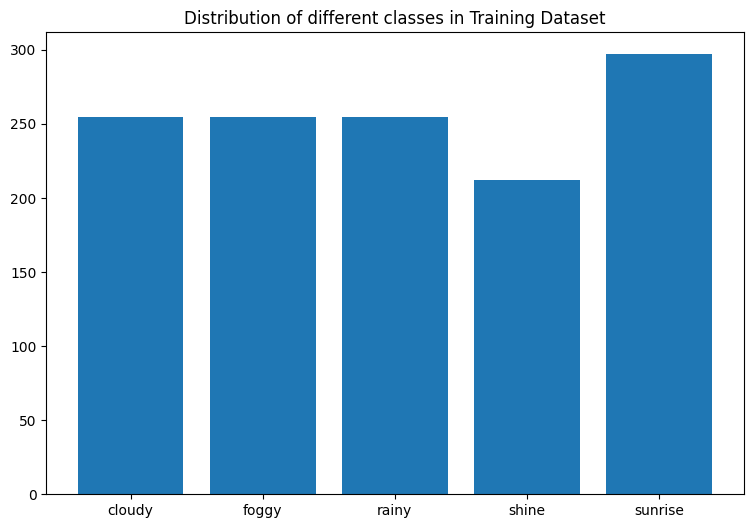

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib

image_folder = ['cloudy', 'foggy', 'rainy', 'shine', 'sunrise']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/content/weather-data/train/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Training Dataset')
plt.show()

In [12]:
for i in ['cloudy', 'foggy', 'rainy', 'shine', 'sunrise']:
    print('Training {} images are: '.format(i)+str(len(os.listdir('/content/weather-data/train/'+i+'/'))))

Training cloudy images are: 255
Training foggy images are: 255
Training rainy images are: 255
Training shine images are: 212
Training sunrise images are: 297


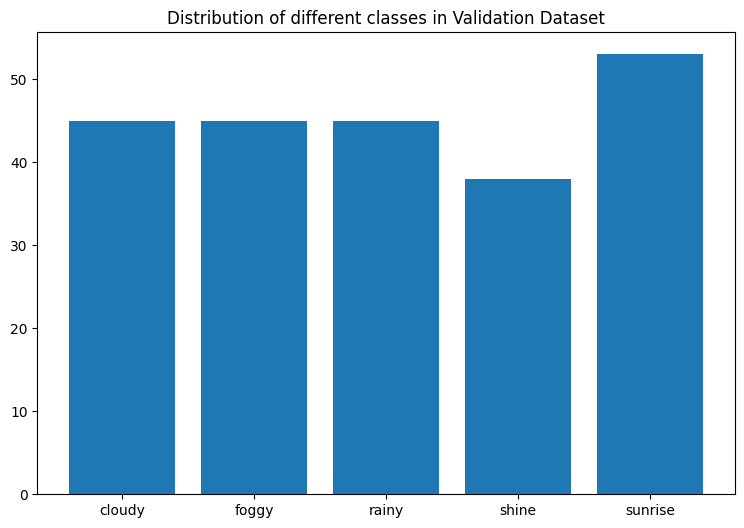

In [13]:
image_folder = ['cloudy', 'foggy', 'rainy', 'shine', 'sunrise']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/content/weather-data/validation/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Validation Dataset')
plt.show()

In [14]:
for i in ['cloudy', 'foggy', 'rainy', 'shine', 'sunrise']:
    print('Valid {} images are: '.format(i)+str(len(os.listdir('/content/weather-data/validation/'+i+'/'))))

Valid cloudy images are: 45
Valid foggy images are: 45
Valid rainy images are: 45
Valid shine images are: 38
Valid sunrise images are: 53


## Step 3. Deep Learning with Data Augumentation

In [15]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [16]:
img_width=256; img_height=256
batch_size=16

In [17]:
TRAINING_DIR = '/content/weather-data/train/'

train_datagen = ImageDataGenerator(rescale = 1/255.0,
                                   rotation_range=30,
                                   zoom_range=0.4,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width))

Found 1274 images belonging to 5 classes.


In [18]:
VALIDATION_DIR = '/content/weather-data/validation/'

validation_datagen = ImageDataGenerator(rescale = 1/255.0)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=batch_size,
                                                              class_mode='categorical',
                                                              target_size=(img_height, img_width)
                                                             )

Found 226 images belonging to 5 classes.


In [19]:
callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best Model
best_model_file = '/content/CNN_aug_best_weights.h5'
best_model = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)

In [20]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)), MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'), MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(256, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(5, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 58, 58, 64)        3

In [21]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics =['accuracy'])

In [22]:
history = model.fit_generator(train_generator,
                              epochs=30,
                              verbose=1,
                              validation_data=validation_generator,
                              callbacks = [best_model]
                              )

Epoch 1/30
80/80 [==============================] - ETA: 0s - loss: 1.4481 - accuracy: 0.3336

80/80 [==============================] - 36s 347ms/step - loss: 1.4481 - accuracy: 0.3336 - val_loss: 1.1578 - val_accuracy: 0.4115
Epoch 2/30
80/80 [==============================] - ETA: 0s - loss: 1.1730 - accuracy: 0.4882

80/80 [==============================] - 26s 321ms/step - loss: 1.1730 - accuracy: 0.4882 - val_loss: 1.2758 - val_accuracy: 0.4469
Epoch 3/30
80/80 [==============================] - ETA: 0s - loss: 1.0631 - accuracy: 0.5377

80/80 [==============================] - 24s 303ms/step - loss: 1.0631 - accuracy: 0.5377 - val_loss: 0.9529 - val_accuracy: 0.5752
Epoch 4/30
80/80 [==============================] - ETA: 0s - loss: 0.9837 - accuracy: 0.5651

80/80 [==============================] - 25s 313ms/step - loss: 0.9837 - accuracy: 0.5651 - val_loss: 1.0496 - val_accuracy: 0.5531
Epoch 5/30
80/80 [==============================] - ETA: 0s - loss: 0.9734 - accuracy: 0.5738

80/80 [==============================] - 27s 337ms/step - loss: 0.9734 - accuracy: 0.5738 - val_loss: 0.9535 - val_accuracy: 0.5973
Epoch 6/30
80/80 [==============================] - ETA: 0s - loss: 0.9495 - accuracy: 0.5628

80/80 [==============================] - 26s 322ms/step - loss: 0.9495 - accuracy: 0.5628 - val_loss: 0.9545 - val_accuracy: 0.5708
Epoch 7/30
80/80 [==============================] - ETA: 0s - loss: 0.9443 - accuracy: 0.5769

80/80 [==============================] - 25s 318ms/step - loss: 0.9443 - accuracy: 0.5769 - val_loss: 0.9103 - val_accuracy: 0.5442
Epoch 8/30
80/80 [==============================] - ETA: 0s - loss: 0.9089 - accuracy: 0.5934

80/80 [==============================] - 25s 318ms/step - loss: 0.9089 - accuracy: 0.5934 - val_loss: 0.9332 - val_accuracy: 0.6062
Epoch 9/30
80/80 [==============================] - ETA: 0s - loss: 0.9295 - accuracy: 0.5950

80/80 [==============================] - 25s 315ms/step - loss: 0.9295 - accuracy: 0.5950 - val_loss: 0.8916 - val_accuracy: 0.6106
Epoch 10/30
80/80 [==============================] - ETA: 0s - loss: 0.9486 - accuracy: 0.5903

80/80 [==============================] - 27s 337ms/step - loss: 0.9486 - accuracy: 0.5903 - val_loss: 1.1057 - val_accuracy: 0.5354
Epoch 11/30
80/80 [==============================] - ETA: 0s - loss: 0.9230 - accuracy: 0.5934

80/80 [==============================] - 25s 315ms/step - loss: 0.9230 - accuracy: 0.5934 - val_loss: 0.8693 - val_accuracy: 0.6150
Epoch 12/30
80/80 [==============================] - ETA: 0s - loss: 0.8867 - accuracy: 0.5989

80/80 [==============================] - 26s 319ms/step - loss: 0.8867 - accuracy: 0.5989 - val_loss: 0.9258 - val_accuracy: 0.6062
Epoch 13/30
80/80 [==============================] - ETA: 0s - loss: 0.8669 - accuracy: 0.6075

80/80 [==============================] - 26s 325ms/step - loss: 0.8669 - accuracy: 0.6075 - val_loss: 0.7973 - val_accuracy: 0.6549
Epoch 14/30
80/80 [==============================] - ETA: 0s - loss: 0.8981 - accuracy: 0.6130

80/80 [==============================] - 24s 306ms/step - loss: 0.8981 - accuracy: 0.6130 - val_loss: 0.8573 - val_accuracy: 0.6018
Epoch 15/30
80/80 [==============================] - ETA: 0s - loss: 0.8447 - accuracy: 0.6232

80/80 [==============================] - 26s 327ms/step - loss: 0.8447 - accuracy: 0.6232 - val_loss: 0.8075 - val_accuracy: 0.6858
Epoch 16/30
80/80 [==============================] - ETA: 0s - loss: 0.8052 - accuracy: 0.6429

80/80 [==============================] - 24s 300ms/step - loss: 0.8052 - accuracy: 0.6429 - val_loss: 0.8957 - val_accuracy: 0.6283
Epoch 17/30
80/80 [==============================] - ETA: 0s - loss: 0.8572 - accuracy: 0.6209

80/80 [==============================] - 25s 313ms/step - loss: 0.8572 - accuracy: 0.6209 - val_loss: 0.9016 - val_accuracy: 0.6327
Epoch 18/30
80/80 [==============================] - ETA: 0s - loss: 0.8769 - accuracy: 0.5934

80/80 [==============================] - 25s 318ms/step - loss: 0.8769 - accuracy: 0.5934 - val_loss: 1.0366 - val_accuracy: 0.5354
Epoch 19/30
80/80 [==============================] - ETA: 0s - loss: 0.8270 - accuracy: 0.6515

80/80 [==============================] - 25s 317ms/step - loss: 0.8270 - accuracy: 0.6515 - val_loss: 0.8157 - val_accuracy: 0.6283
Epoch 20/30
80/80 [==============================] - ETA: 0s - loss: 0.8158 - accuracy: 0.6507

80/80 [==============================] - 25s 318ms/step - loss: 0.8158 - accuracy: 0.6507 - val_loss: 0.9996 - val_accuracy: 0.6062
Epoch 21/30
80/80 [==============================] - ETA: 0s - loss: 0.8227 - accuracy: 0.6523

80/80 [==============================] - 25s 318ms/step - loss: 0.8227 - accuracy: 0.6523 - val_loss: 0.7769 - val_accuracy: 0.6814
Epoch 22/30
80/80 [==============================] - ETA: 0s - loss: 0.7901 - accuracy: 0.6750

80/80 [==============================] - 26s 320ms/step - loss: 0.7901 - accuracy: 0.6750 - val_loss: 0.9481 - val_accuracy: 0.6239
Epoch 23/30
80/80 [==============================] - ETA: 0s - loss: 0.7739 - accuracy: 0.6625

80/80 [==============================] - 25s 317ms/step - loss: 0.7739 - accuracy: 0.6625 - val_loss: 0.7534 - val_accuracy: 0.6681
Epoch 24/30
80/80 [==============================] - ETA: 0s - loss: 0.8102 - accuracy: 0.6641

80/80 [==============================] - 25s 316ms/step - loss: 0.8102 - accuracy: 0.6641 - val_loss: 0.8506 - val_accuracy: 0.6327
Epoch 25/30
80/80 [==============================] - ETA: 0s - loss: 0.8007 - accuracy: 0.6491

80/80 [==============================] - 25s 316ms/step - loss: 0.8007 - accuracy: 0.6491 - val_loss: 0.8320 - val_accuracy: 0.6549
Epoch 26/30
80/80 [==============================] - ETA: 0s - loss: 0.7990 - accuracy: 0.6452

80/80 [==============================] - 27s 343ms/step - loss: 0.7990 - accuracy: 0.6452 - val_loss: 0.9051 - val_accuracy: 0.6416
Epoch 27/30
80/80 [==============================] - ETA: 0s - loss: 0.7952 - accuracy: 0.6429

80/80 [==============================] - 24s 305ms/step - loss: 0.7952 - accuracy: 0.6429 - val_loss: 0.8165 - val_accuracy: 0.6416
Epoch 28/30
80/80 [==============================] - ETA: 0s - loss: 0.7598 - accuracy: 0.6562

80/80 [==============================] - 24s 301ms/step - loss: 0.7598 - accuracy: 0.6562 - val_loss: 0.8051 - val_accuracy: 0.6637
Epoch 29/30
80/80 [==============================] - ETA: 0s - loss: 0.7794 - accuracy: 0.6727

80/80 [==============================] - 25s 316ms/step - loss: 0.7794 - accuracy: 0.6727 - val_loss: 0.7804 - val_accuracy: 0.6681
Epoch 30/30
80/80 [==============================] - ETA: 0s - loss: 0.7404 - accuracy: 0.6829

80/80 [==============================] - 25s 318ms/step - loss: 0.7404 - accuracy: 0.6829 - val_loss: 0.7093 - val_accuracy: 0.6947


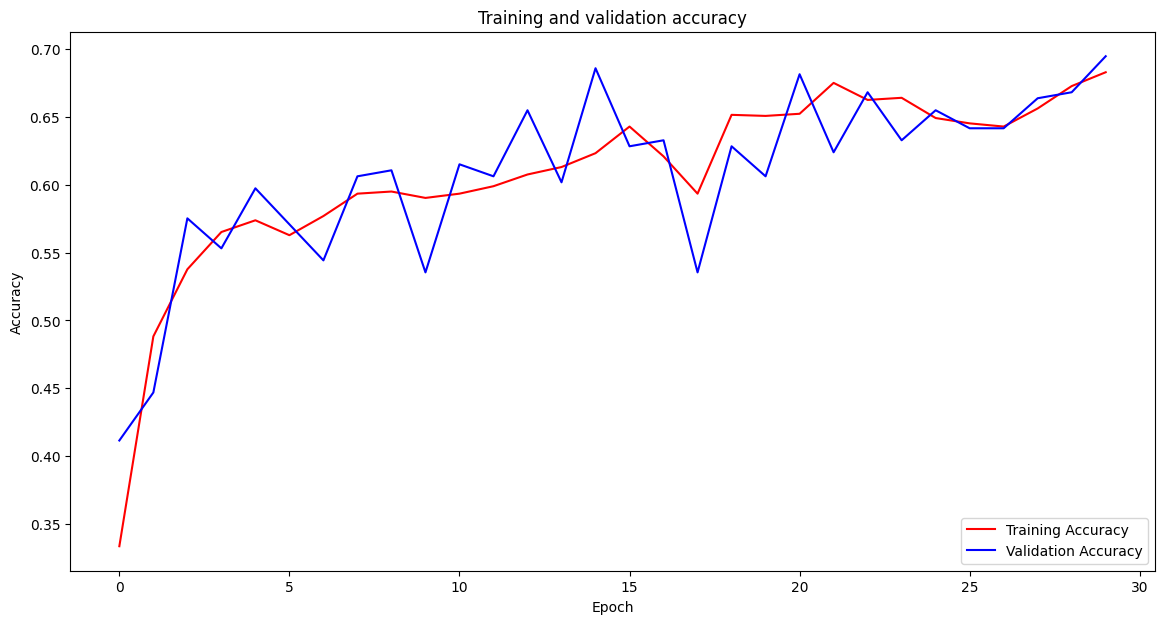

In [23]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

In [33]:
model.save('/content/weather.h5')

Text(0.5, 1.0, 'Training and validation loss')

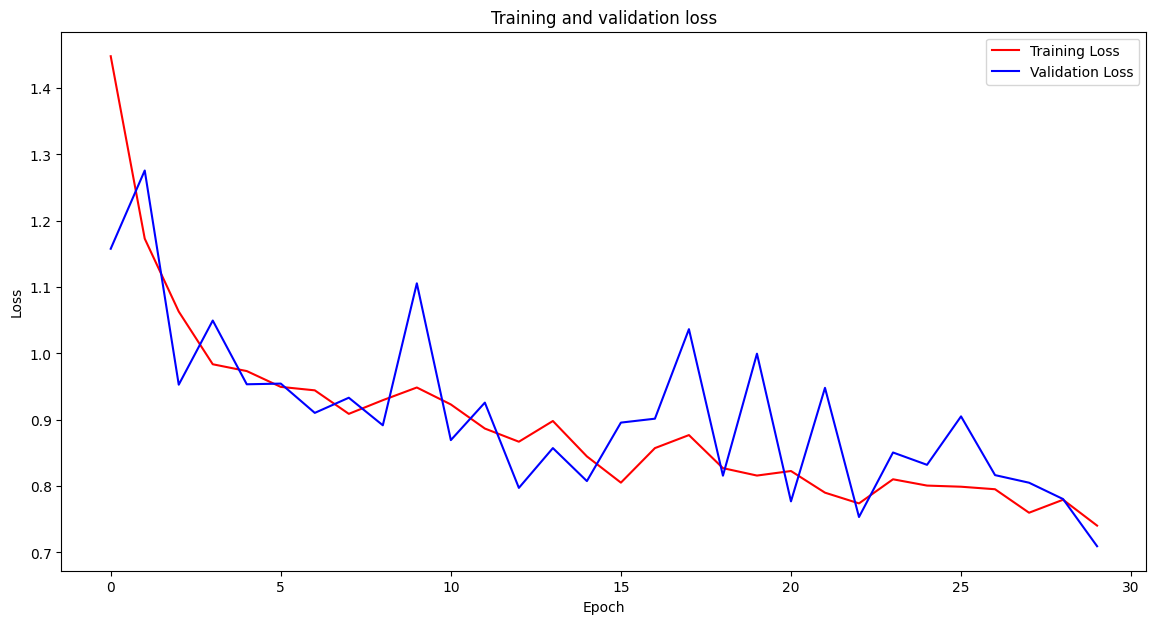

In [24]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

In [25]:
## Test Performance on Test Data
import pandas as pd
import numpy as np
from keras.preprocessing.image import load_img, img_to_array

def preprocess_image(path):
    img = load_img(path, target_size = (img_height, img_width))
    a = img_to_array(img)
    a = np.expand_dims(a, axis = 0)
    a /= 255.
    return a

## Step 4. Checking performance on Test Data (Out of the sample)

In [26]:
# Read Test Images Dir and their labels
test_images_dir = '/content/dataset/alien_test/'
test_df = pd.read_csv('/content/dataset/test.csv')

# put them in a list
test_dfToList = test_df['Image_id'].tolist()
test_ids = [str(item) for item in test_dfToList]

test_images = [test_images_dir+item for item in test_ids]
test_preprocessed_images = np.vstack([preprocess_image(fn) for fn in test_images])
np.save('/content/test_preproc_CNN.npy', test_preprocessed_images)

In [27]:
array = model.predict(test_preprocessed_images, batch_size=1, verbose=1)
answer = np.argmax(array, axis=1)
print(answer)

30/30 [==============================] - 1s 3ms/step
[0 0 3 3 2 1 2 0 0 0 4 3 2 0 2 2 2 2 2 2 3 3 3 4 4 4 4 4 4 4]


In [28]:
test_df = pd.read_csv('/content/dataset/test.csv')
y_true = test_df['labels']
y_pred = array
print(y_true)

0     0
1     0
2     0
3     0
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    2
15    2
16    2
17    2
18    2
19    2
20    3
21    3
22    3
23    4
24    4
25    4
26    4
27    4
28    4
29    4
Name: labels, dtype: int64


In [29]:
from sklearn.metrics import log_loss
loss = log_loss(y_true, y_pred, eps=1e-15, normalize=True, sample_weight=None, labels=None)

In [30]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true, answer)
conf_mat

array([[2, 0, 0, 2, 0],
       [4, 1, 3, 1, 1],
       [0, 0, 6, 0, 0],
       [0, 0, 0, 3, 0],
       [0, 0, 0, 0, 7]])

In [ ]:
train_dir = '/content/weather-data/train/'
classes = os.listdir(train_dir)

In [31]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = cm.round(2)
        #print("Normalized confusion matrix")
    else:
        cm=cm
        #print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

1/1 [==============================] - 0s 119ms/step
Predicted class: cloudy with confidence: 89.48%


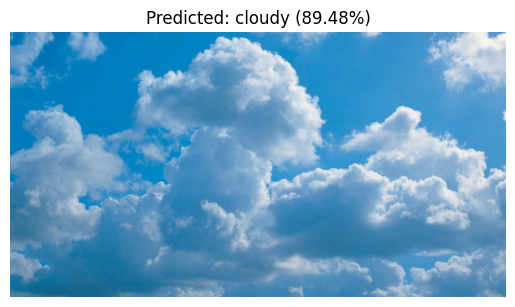

In [40]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

# Load your trained model
model = load_model('/content/weather.h5')

# Define the class names
class_names = ['foggy', 'rainy', 'shine', 'cloudy', 'sunrise']

def preprocess_image(img_path):
    """
    Preprocess the input image to the format required by the model.
    """
    img = image.load_img(img_path, target_size=(256, 256))  # Adjust target_size to match your model's input size
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize the image
    return img_array

def predict_image_class(img_path):
    """
    Predict the class of the input image.
    """
    img_array = preprocess_image(img_path)
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions)]
    confidence = np.max(predictions)

    return predicted_class, confidence

def plot_image_with_prediction(img_path, predicted_class, confidence):
    """
    Plot the image with the predicted class label.
    """
    img = image.load_img(img_path)
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class} ({confidence*100:.2f}%)")
    plt.axis('off')
    plt.show()

if __name__ == "__main__":
    img_path = '/content/dataset/alien_test/Cloud_4.jpg'  # Replace with your image path
    predicted_class, confidence = predict_image_class(img_path)
    print(f"Predicted class: {predicted_class} with confidence: {confidence*100:.2f}%")
    plot_image_with_prediction(img_path, predicted_class, confidence)


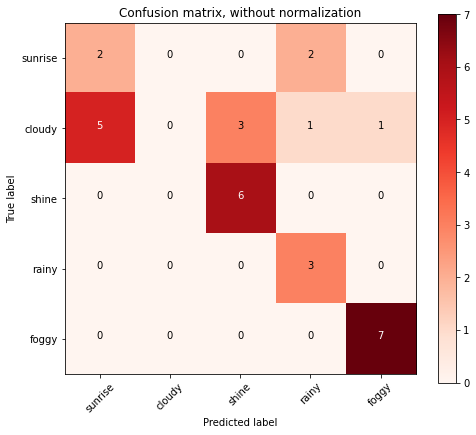

In [ ]:
np.set_printoptions(precision=2)

fig1 = plt.figure(figsize=(7,6))
plot_confusion_matrix(conf_mat, classes=classes, title='Confusion matrix, without normalization')
plt.show()